[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    climate change interesting hustle global warmi...
1    rt watch beforetheflood right travel world tac...
2    fabulous leonardo dicaprios film climate chang...
3    rt watched amazing documentary leonardodicapri...
4    rt pranita biswasi lutheran odisha give testim...
Name: cleaned_message, dtype: object
Accuracy with CountVectorizer: 0.711571282284674
Classification Report (CountVectorizer):
               precision    recall  f1-score   support

          -1       0.65      0.48      0.55       784
           0       0.57      0.51      0.54      1582
           1       0.75      0.83      0.79      4514
           2       0.74      0.70      0.72      1909

    accuracy                           0.71      8789
   macro avg       0.68      0.63      0.65      8789
weighted avg       0.71      0.71      0.71      8789

Accuracy with TF-IDF: 0.7097508248947548
Classification Report (TF-IDF):
               precision    recall  f1-score   support

          -1       0.74      0.41

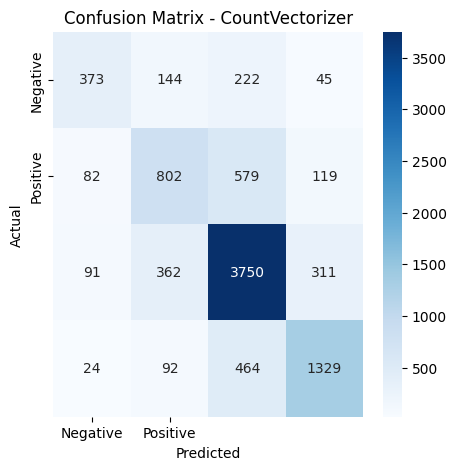

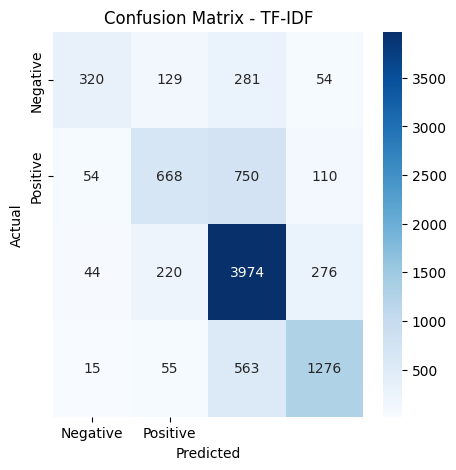

In [ ]:
# Import required libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # To access stop words for preprocessing
from nltk.stem import WordNetLemmatizer  # For lemmatization
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # To convert text into numerical features
from sklearn.linear_model import LogisticRegression  # To build the sentiment analysis model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # To evaluate the model's performance
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/twitter_sentiment_data.csv'  # Path to the dataset file
data = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Download NLTK stopwords and WordNet
nltk.download('stopwords')  # Ensures stop words are available for text preprocessing
nltk.download('wordnet')

# Preprocess the text
stop_words = set(stopwords.words('english'))  # Set of common stop words in English

# Lemmatization is better than simple stemming because it ensures the transformed word is meaningful.
lemmatizer = WordNetLemmatizer() # large lexical database of English words -- reduce words to their root form

# Function to clean and preprocess the text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"@\w+|#", '', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-z\s]", '', text)  # Remove punctuation and non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization & stop word removal
    return text

# Apply the preprocessing function to the 'message' column
data['cleaned_message'] = data['message'].apply(preprocess_text)
print(data['cleaned_message'].head())


# Extract features and labels using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # Use the top 5000 words as features
X_count = count_vectorizer.fit_transform(data['cleaned_message']).toarray()  # Transform text using CountVectorizer

# Train-test split using CountVectorizer features
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Extract features and labels using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 words as features
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_message']).toarray()  # Transform text using TF-IDF
y = data['sentiment']  # Target variable (sentiment labels)

# Build the model using CountVectorizer features
model_count = LogisticRegression(max_iter=1000)  # Initialize a logistic regression model
model_count.fit(X_train_count, y_train)  # Train the model

# Evaluate the model using CountVectorizer features
y_pred_count = model_count.predict(X_test_count)  # Predict sentiments for the test set
print("Accuracy with CountVectorizer:", accuracy_score(y_test, y_pred_count))  # Calculate accuracy
print("Classification Report (CountVectorizer):\n", classification_report(y_test, y_pred_count))  # Print classification report


# Train-test split using TF-IDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Build the model using TF-IDF features
model_tfidf = LogisticRegression(max_iter=1000)  # Initialize a logistic regression model
model_tfidf.fit(X_train_tfidf, y_train)  # Train the model

# Evaluate the model using TF-IDF features
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)  # Predict sentiments for the test set
print("Accuracy with TF-IDF:", accuracy_score(y_test, y_pred_tfidf))  # Calculate accuracy
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))  # Print classification report

# Display Confusion Matrix for CountVectorizer
cm_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(5,5))
sns.heatmap(cm_count, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CountVectorizer")
plt.show()

# Display Confusion Matrix for TF-IDF
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TF-IDF")
plt.show()


 What This Means
* True Positives (TP) = 3750
* Correctly classified positive tweets (model got these right).


* True Negatives (TN) = 373
* Correctly classified negative tweets (accurate predictions).


* False Positives (FP) = 144 + 311
* Misclassified negative tweets as positive → Overestimating positivity.


* False Negatives (FN) = 82 + 579 + 91 + 24
* Misclassified positive tweets as negative → Model is missing some positive tweets.


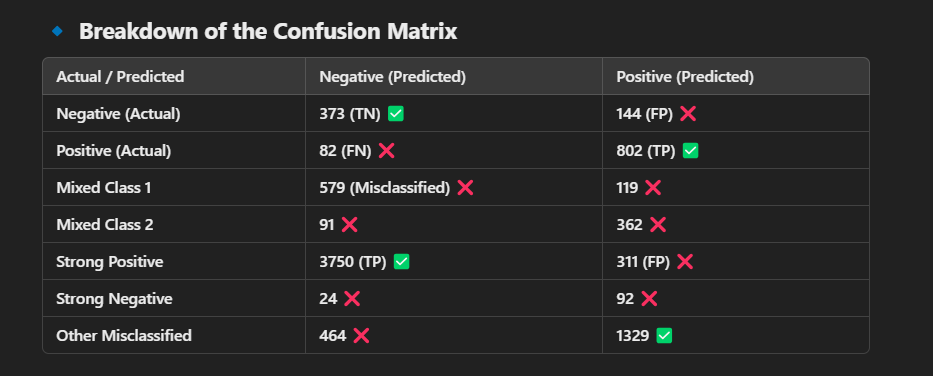